# Project: TMDB Movie Dataset Investigation

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>This data set contains information about 10,000 movies collected from The Movie Database (TMDb) in 99 years (1971-2070), including user ratings and revenue.


**List of questions**
- Q.1 : In which year most movies were released?
- Q.2 : Which genres are most popular from year to year (genre hybrid mode)?
- Q.3 : Which genres are most popular from year to year? (genre split mode)?
- Q.4 : Display genre wise poularity distribution in best movies
- Q.5 : Most popular genre based distribution
- Q.6 : What kind of properties are associated with movies having high revenue?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
tmbd = pd.read_csv('tmdb-movies.csv')
tmbd.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08



### Data Cleaning

- Step 1 : Assess data and build intuition
- Step 2 : Refine data
     - Step 2.1 : Check for data count and coulumn, build understanding with uniques values and statistics of columns   
     - Step 2.2 : check for duplicates and null records
     - Step 2.3 : Drop columns which might not be required
     - Step 2.4 : check for datatypes, and update if required
     - Step 2.5 : Added a new column, release_year, derived from release_date
     - Step 2.6 : Updating 'cast','director','genres','production_companies' column data to lowercase

In [3]:
tmbd.shape

(10866, 21)

In [4]:
tmbd.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [5]:
tmbd.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
tmbd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [7]:
sum(tmbd.duplicated())

1

Duplicate row needs to be dropped

In [8]:
tmbd = tmbd.drop_duplicates()

Checking for null record

In [9]:
tmbd.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [10]:
tmbd.drop(['tagline','keywords','overview','homepage','production_companies'], axis = 1, inplace = True)

In [11]:
tmbd.isnull().sum()

id                 0
imdb_id           10
popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [12]:
tmbd = tmbd.dropna()

In [13]:
tmbd['release_date'] = tmbd['release_date'].astype('datetime64')
tmbd['release_year'] = tmbd['release_date'].dt.year

In [14]:
lower_case = ['cast','director','genres']
for col in lower_case:
    tmbd[col] = tmbd[col].str.lower()

<a id='eda'></a>
## Exploratory Data Analysis

### In which year most movies were released?

In [15]:
grp = tmbd.groupby(['release_year']).count()
grp.sort_values(['id'], axis=0, ascending=False)['id'].head(1)

release_year
2014    682
Name: id, dtype: int64

### Which genres are most popular from year to year (genre hybrid mode)? 

Created an empty datframe same as tmbd named 'tmbd_pop_yearly'. Getting most popular movie of each year and storing them in new dataframe 'tmbd_pop_yearly'

Storing all unique year values in release_yr

Storing one most popular movie of the year in tmbd_pop_yearly dataframe.

In [16]:
tmbd_pop_yearly = pd.DataFrame(data = None, columns = tmbd.columns)
release_yr = tmbd.release_year.unique()

for y in release_yr:
    df = tmbd.query('release_year == {}'.format(y))
    df1 = df.sort_values(['popularity'], axis = 0, ascending = False).head(1)
    tmbd_pop_yearly = tmbd_pop_yearly.append(df1)


tmbd_pop_yearly

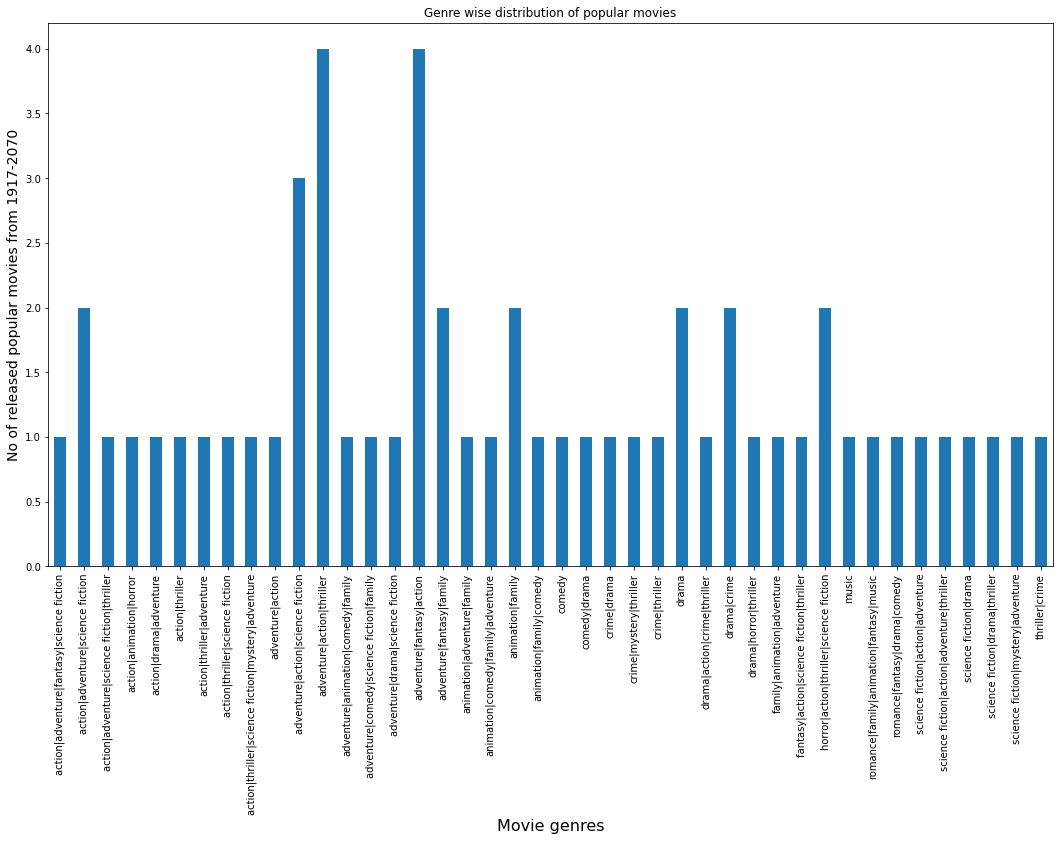

In [17]:
tmbd_pop_yearly.groupby(['genres'])['release_year'].count().plot(kind = 'bar', figsize = (18,10))
plt.title('Genre wise distribution of popular movies')
plt.ylabel('No of released popular movies from 1917-2070', fontsize = 14)
plt.xlabel('Movie genres', fontsize = 16);

### Which genres are most popular from year to year (genre split mode)? 
###### (seperating genres by | symbol) ex: genre action|horror is divided into 2 different rows

In [18]:
tmbd_pop_yearly['genres']=tmbd_pop_yearly['genres'].str.replace('|',',', regex = False)

In [19]:
tmbd_pop_yearly['genres'] = tmbd_pop_yearly['genres'].astype(str).str.split(',')

In [20]:
tmbd_pop_yearly_exp = tmbd_pop_yearly.explode('genres',ignore_index=True)

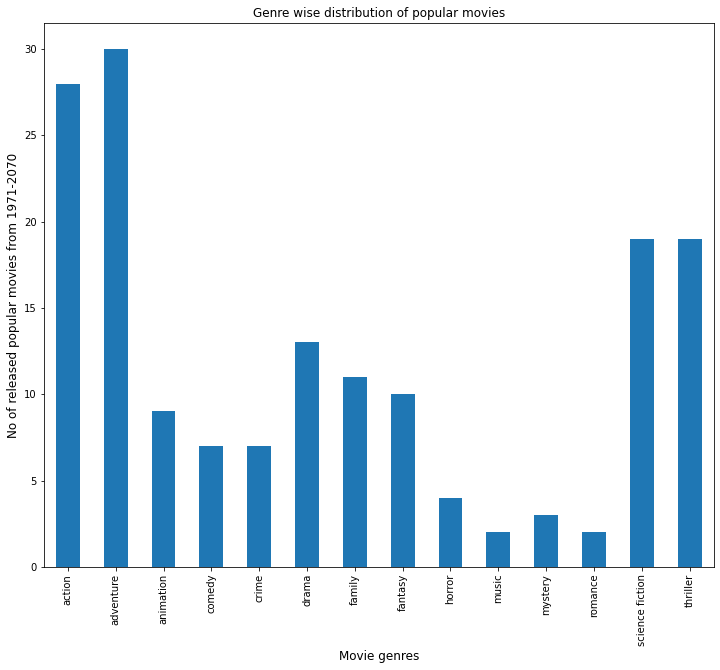

In [21]:
tmbd_pop_yearly_exp.groupby(['genres'])['release_year'].count().plot(kind = 'bar', figsize = (12,10))
plt.title('Genre wise distribution of popular movies')
plt.ylabel('No of released popular movies from 1971-2070', fontsize = 12)
plt.xlabel('Movie genres', fontsize = 12);

###### Display genre wise poularity distribution in best movies

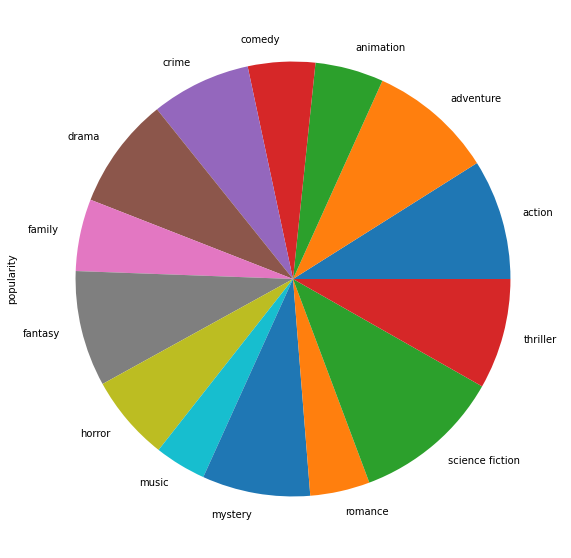

In [22]:
tmbd_pop_yearly_exp.groupby(['genres'])['popularity'].mean().plot(kind = 'pie',y='genres', subplots=True,figsize=(10,10));

###### Most popular genre based distribution

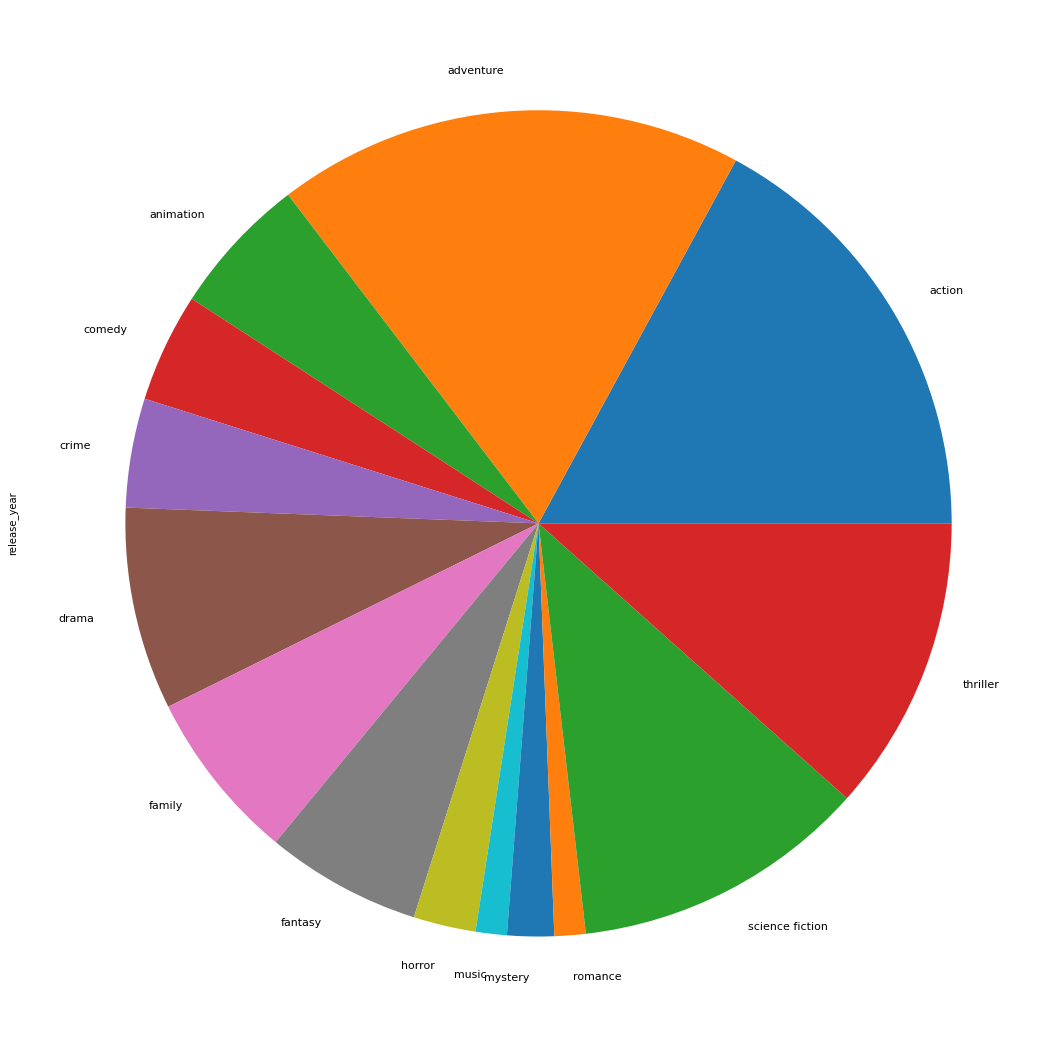

In [23]:
tmbd_pop_yearly_exp.groupby(['genres'])['release_year'].count().plot(kind = 'pie',y='genres', subplots=True,figsize=(19,19), fontsize= 11);

### What kind of properties are associated with movies having high revenue?

Based on built intuition, 3 fields are selected popularity, vote_average, budget_adj and run time. Finding their impact on revenue.

Do more popular movies earn high revenue?

Do high vote_average movies earn high revenues?

Do high budgetd movies earn more revenue?

Do short movies earn more?
###### Do popular movies make more revenue_adj?

In [24]:
pop_med = tmbd.popularity.median()
low_pop = tmbd.query('popularity < {}'.format(pop_med))
high_pop = tmbd.query('popularity >= {}'.format(pop_med))
low_pop.shape[0] + high_pop.shape[0] == tmbd.shape[0]

True

In [25]:
low_pop['revenue_adj'].mean()<high_pop['revenue_adj'].mean()

True

Yes, popular movies do earn more

###### Are high vote_average movies have more revenue_adj

In [26]:
vote_med = tmbd.vote_average.median()
low_vote = tmbd.query('vote_average < {}'.format(vote_med))
high_vote = tmbd.query('vote_average >= {}'.format(vote_med))
low_vote.shape[0] + high_vote.shape[0] == tmbd.shape[0]

True

In [27]:
low_vote['revenue_adj'].mean()<high_vote['revenue_adj'].mean()

True

*Yes, movies with high votes earn more*

###### Does high budget movies earn more revenue?

In [28]:
budget_med = tmbd.budget_adj.median()
low_budget = tmbd.query('budget_adj < {}'.format(budget_med))
high_budget = tmbd.query('budget_adj >= {}'.format(budget_med))
low_vote.shape[0] + high_vote.shape[0] == tmbd.shape[0]

True

In [29]:
low_budget['revenue_adj'].mean() < high_budget['revenue_adj'].mean()

False

*No, High budget does not impacts revenue*

###### Do short movies earn more?

In [30]:
runtime_mean = tmbd.runtime.mean()
low_runtime = tmbd.query('runtime < {}'.format(runtime_mean))
high_runtime = tmbd.query('runtime >= {}'.format(runtime_mean))
low_runtime.shape[0] + high_runtime.shape[0] == tmbd.shape[0]

True

In [31]:
low_runtime['revenue_adj'].mean() < high_runtime['revenue_adj'].mean()

True

*No, short movies are not associated with high tevenue earnings*

Scatter plots to validate the same relation between different fields and revenue of above 

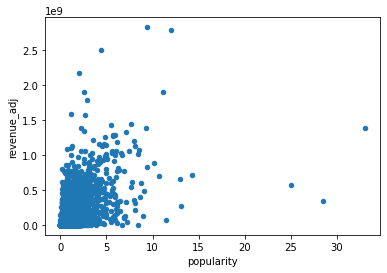

In [32]:
tmbd.plot(x="popularity", y="revenue_adj", kind="scatter");

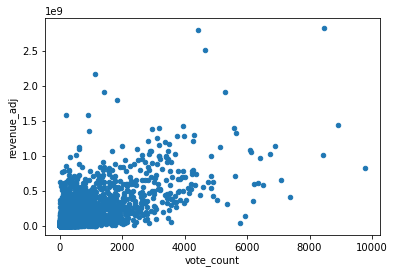

In [33]:
tmbd.plot(x="vote_count", y="revenue_adj", kind="scatter");

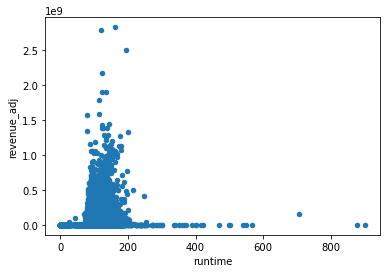

In [34]:
tmbd.plot(x="runtime", y="revenue_adj", kind="scatter");

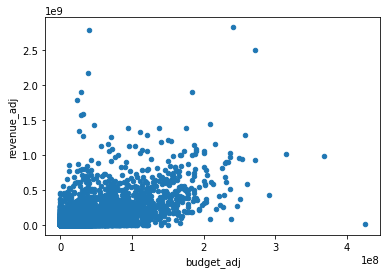

In [35]:
tmbd.plot(x="budget_adj", y="revenue_adj", kind="scatter");

<a id='conclusions'></a>
## Conclusions

- Year 2014 topped in maximum number of movie released. 684 movies were released this year.
- People prefer adventure|action|thriller & adventure|fantasy|action movies more.
- People prefer adventure movies most.
- High earning movies have longer runtime than average, receive high votes and gain more popularity. 
- Budget of movies do not impact on revenue earnings